# Bayesian Regression exercise
## House price prediction

Kaggle dataset and example: 
https://www.kaggle.com/javihm77/bayesian-regression-house-price-prediction
https://www.kaggle.com/code/shtrausslearning/bayesian-regression-house-price-prediction

In [23]:
import pandas as pd #we use this to load, read and transform the dataset
import numpy as np #we use this for statistical analysis
import matplotlib.pyplot as plt #we use this to visualize the dataset
import seaborn as sns #we use this to make countplots
import sklearn.metrics as sklm #This is to test the models
from sklearn.model_selection import train_test_split #train test split

In [24]:
# load the dataset
df = pd.read_csv('housing.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [27]:
# Let's show all columns with missing data as well:
df[df.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [28]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
def impute_knn(df):
    
    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan 

    for col in cols_nan:                
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ldf,ldf_putaside],axis=1)

In [29]:
# Call function that imputes missing data
df2 = impute_knn(df)
# looks like we have a full feature matrix
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


/Users/javierhernandez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/javierhernandez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [30]:

# 70/30 Split should do
trdata,tedata = train_test_split(df2,test_size=0.3,random_state=43)
gcolor = "#A29FF4"

## EDA Exploratory data analysis

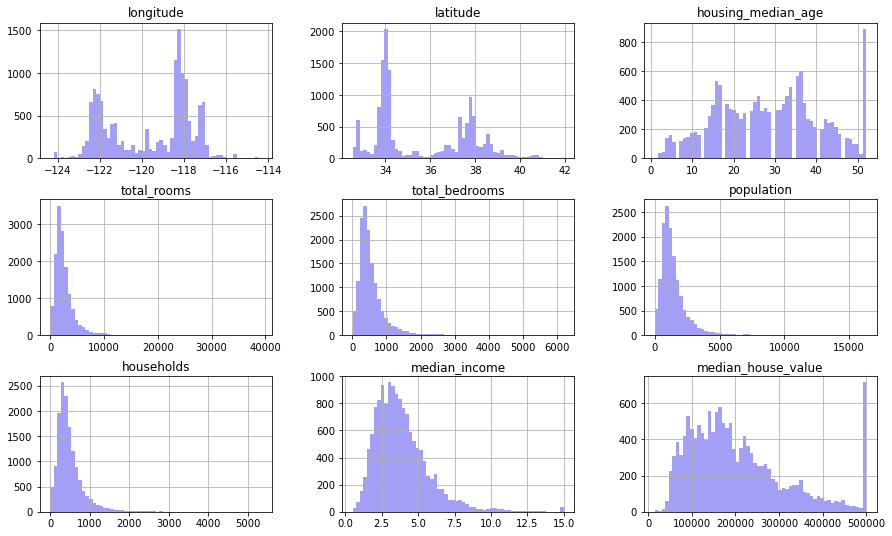

In [31]:
trdata.hist(bins=60, figsize=(15,9),color=gcolor);
plt.show()

In [32]:

def corrMat(df,id=False):
    ''' Function to plot correlation of features '''
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,9))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);
    plt.show()  

<ipython-input-32-7df0bf413736>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype=np.bool)


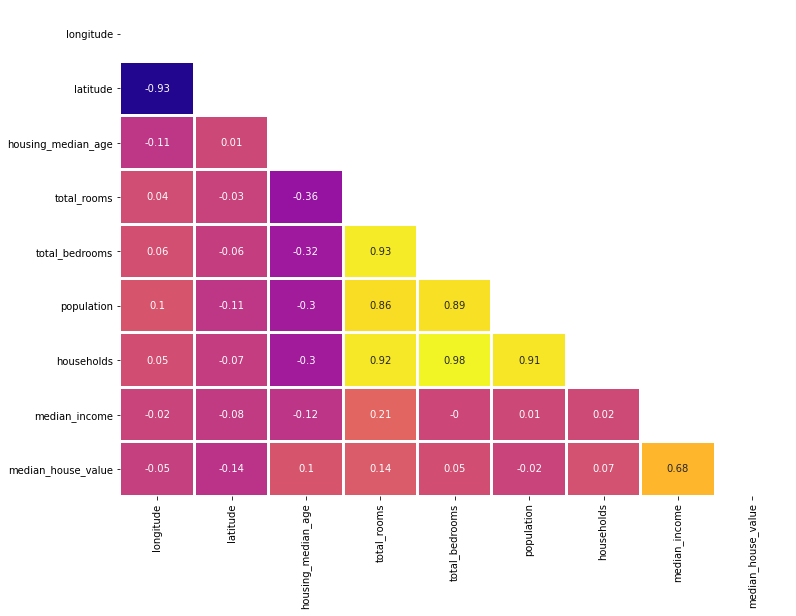

In [33]:
corrMat(trdata) # plot masked numpy correlation matrix

In [34]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    


<ipython-input-34-f6daee908a7c>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))


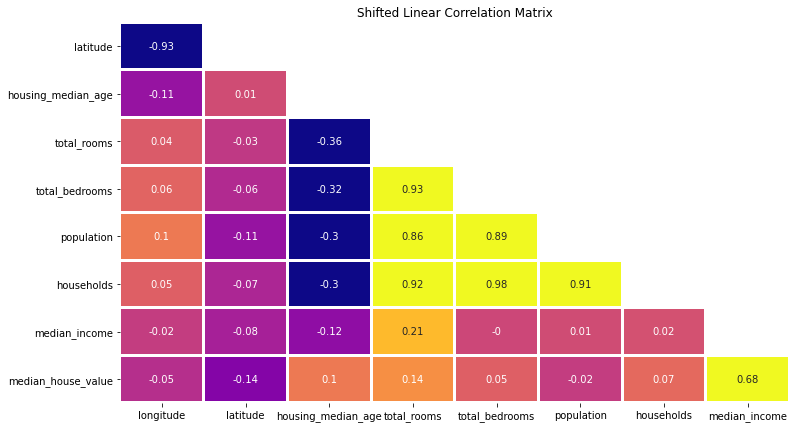

In [35]:
corrMat(trdata)

In [36]:
''' Draw a Bivariate Seaborn Pairgrid /w KDE density w/ '''
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()

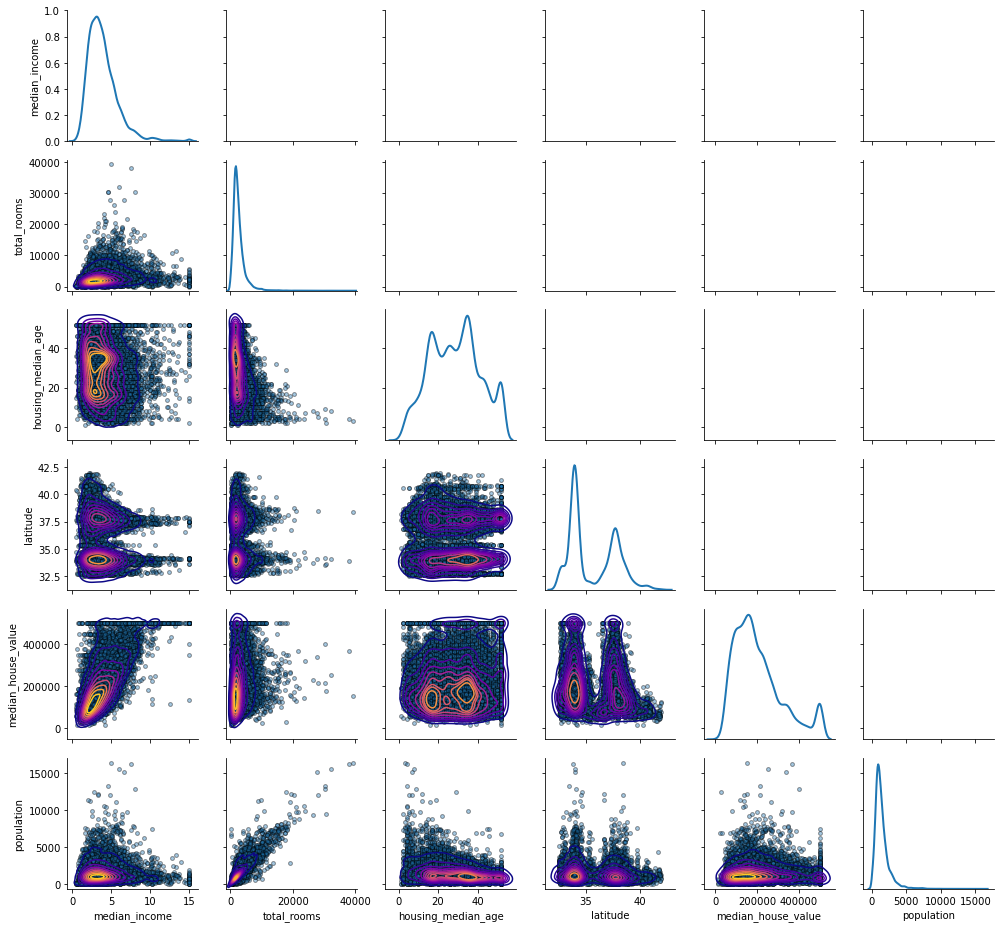

In [37]:
# Seaborn get a little slow, let's plot some interesting features
tlist = ['median_income','total_rooms','housing_median_age','latitude','median_house_value','population']
snsPairGrid(trdata[tlist]) 

## Outliers

Outlier in median house value:  500001.0


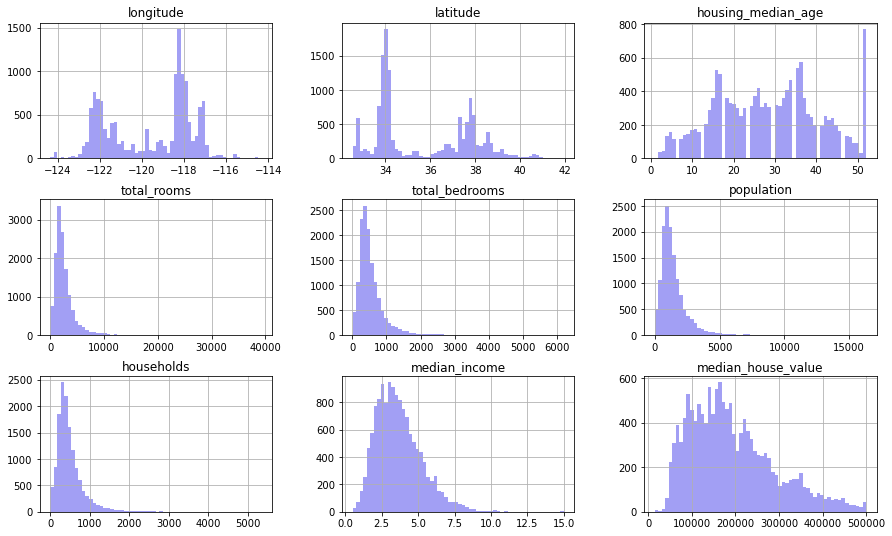

In [38]:
# trdata_upd : training data w/ removed outliers
maxval2 = trdata['median_house_value'].max() # get the maximum value
print("Outlier in median house value: ",maxval2)
trdata_upd = trdata[trdata['median_house_value'] != maxval2] 
tedata_upd = tedata[tedata['median_house_value'] != maxval2]

trdata_upd.hist(bins=60, figsize=(15,9),color=gcolor);
plt.show() # looks like its completely removed.

In [39]:
maxval_hma = trdata['housing_median_age'].max()
print("Max housing media age: ",maxval_hma)

Max housing media age:  52.0


<ipython-input-40-a670eb8ee016>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trdata_upd['diag_coord'] = (trdata_upd['longitude'] + trdata_upd['latitude'])         # 'diagonal coordinate', works for this coord
<ipython-input-40-a670eb8ee016>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trdata_upd['bedperroom'] = trdata_upd['total_bedrooms']/trdata_upd['total_rooms']     # feature w/ bedrooms/room ratio
<ipython-input-34-f6daee908a7c>:7: DeprecationWarning: `np.bool` is a deprecated alias for the buil

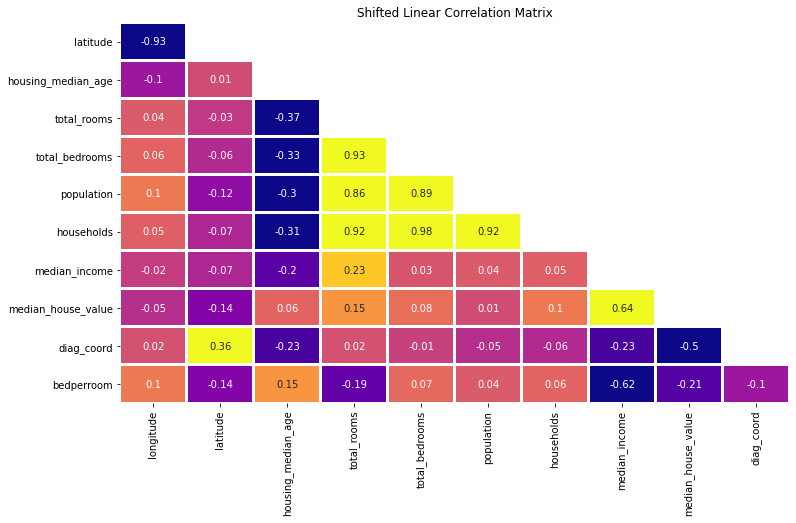

In [40]:
# Make a feature that contains both longtitude & latitude
trdata_upd['diag_coord'] = (trdata_upd['longitude'] + trdata_upd['latitude'])         # 'diagonal coordinate', works for this coord
trdata_upd['bedperroom'] = trdata_upd['total_bedrooms']/trdata_upd['total_rooms']     # feature w/ bedrooms/room ratio
corrMat(trdata_upd)

# update test data as well
tedata_upd['diag_coord'] = (tedata_upd['longitude'] + tedata_upd['latitude'])
tedata_upd['bedperroom'] = tedata_upd['total_bedrooms']/tedata_upd['total_rooms']     # feature w/ bedrooms/room ratio

## Creating model 

In [56]:
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from scipy.stats import multivariate_normal
from scipy.stats import multivariate_normal
from scipy.stats import norm as univariate_normal

from sklearn.linear_model import BayesianRidge, LinearRegression


In [57]:
class BR(BaseEstimator,RegressorMixin):

    # instantiation values
    def __init__(self,lamd=1.0e-5,alph=1e-5,maxiter=2000,rtol=1.0e-5,verbose=True):    
        self.maxiter = maxiter # class contains only tunable hyperparameters (max convergence iteration)
        self.rtol = rtol       # convergence tolerance for hyperparameters
        self.lamd = lamd   # hyperparameter 
        self.alph = alph     # hyperparameter
        self.verbose = verbose # can be activated to check coverged hyperparameters
    
    # compute mean cofficients/covariance matrix of posterior mean
    @staticmethod
    def posterior(X,y,lamd,alph):
        ndim = X.shape[1]
        S_N_inv = lamd * np.eye(ndim) + alph * X.T.dot(X) 
        S_N = inv(S_N_inv)                                      
        m_N = alph * S_N.dot(X.T).dot(y)                
        return m_N, S_N

    ''' train a bayesian ridge regression model + nearest classification '''
    
    def fit(self,X,y):

        ''' A. Check Input Data Compatibility '''
        if(type(X) is np.ndarray):
            self.X = X;self.y = y
        else:
            self.X = X.values; self.y = y.values
        ntot,ndim = self.X.shape

        # set initial value for hyperparameters
        eig0 = np.linalg.eigvalsh(self.X.T.dot(self.X))  # diagonal component (ndim,)

        # tune hyperparameters via convergence tolerance.
        for niter in range(self.maxiter):

            alph1 = self.alph
            lamd1 = self.lamd
            eig = eig0*self.alph

            # make prediction on training data
            self.m_N, self.S_N = self.posterior(self.X,self.y,self.lamd,self.alph)

            gamma = np.sum(eig/(eig+self.lamd))
            self.lamd = gamma / np.sum(self.m_N ** 2)
            Ibeta = 1.0 / (ntot-gamma) * np.sum((self.y - self.X.dot(self.m_N)) ** 2)
            self.beta = 1.0/Ibeta

            # define exit condition
            if np.isclose(lamd1,self.lamd,self.rtol) and np.isclose(alph1,self.alph,self.rtol):
                if(self.verbose is True):
                    print(f'{self.rtol} achieved at {niter+1} iterations.')
                    print(f'Converged Hyperparameters: {self.lamd,self.alph}')
                return self

        return self

    ''' make new predictions; mean + variance of posterior predictive distribution '''
    
    def predict(self,X):
        if(type(X) is np.ndarray):
            self.X = X
        else:
            self.X = X.values
        self.mu_s = X.dot(self.m_N)
        self.cov_s = 1.0 / self.alph + np.sum(X.dot(self.S_N) * X, axis=1)
        return self.mu_s

In [58]:
''' Draw a a single Heatmap using Seaborn '''
def heatmap1(values,xlabel,ylabel,xticklabels,yticklabels,
            cmap='plasma',vmin=None,vmax=None,fmt="%0.2f"):

    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(values, ax=ax,cmap=cmap)
    
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
    ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
    ax.set_xticklabels(xticklabels);ax.set_yticklabels(yticklabels)
    ax.set_title('BR()')
    ax.set_aspect(1)
    
    for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")

In [59]:
# Model Evaluation w/ Cross Validation
def modelEval(ldf,feature='median_house_value',model_id = 'dummy'):
    
    # Input: Feature & Target DataFrame

    # Split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]     # remove target variable
    
    # Pick Model 
    if(model_id is 'dummy'):    model = DummyRegressor()
    if(model_id is 'br'):    model = BR(verbose=False)  
    if(model_id is 'rf'):    model = RandomForestRegressor(n_estimators=10,random_state=10)
    
    ''' Parameter Based Cross Validation (No Pipeline)'''
#     gscv = GridSearchCV(model,param_grid,cv=5)
#     gscv.fit(X,y)
#     results = pd.DataFrame(gscv.cv_results_)
#     scores = np.array(results.mean_test_score).reshape(7,7)
    
#     # plot the cross validation mean scores
#     heatmap1(scores,xlabel='lamda',xticklabels=param_grid['lamd'],
#                     ylabel='alpha',yticklabels=param_grid['alph'])
    
    ''' Standard Cross Validation '''
    cv_score = np.sqrt(-cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error'))
    print("Scores:",cv_score);print("Mean:", cv_score.mean());print("std:", cv_score.std())

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-59-93b2d9631b38>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(model_id is 'dummy'):    model = DummyRegressor()
<ipython-input-59-93b2d9631b38>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(model_id is 'br'):    model = BR(verbose=False)
<ipython-input-59-93b2d9631b38>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(model_id is 'rf'):    model = RandomForestRegressor(n_estimators=10,random_state=10)


In [60]:
# A simple comparison model
modelEval(trdata,model_id='dummy')

Scores: [116663.87060309 114153.82551734 115145.11203806 113858.4275113
 117202.98846612]
Mean: 115404.84482718134
std: 1329.840847682591


In [61]:
# Original Features
modelEval(trdata,model_id='br')

Scores: [nan nan nan nan nan]
Mean: nan
std: nan


/Users/javierhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/javierhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-57-8bac4e116a69>", line 32, in fit
    eig0 = np.linalg.eigvalsh(self.X.T.dot(self.X))  # diagonal component (ndim,)
TypeError: can't multiply sequence by non-int of type 'str'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/javierhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent ca

In [62]:
# Extra Features
modelEval(trdata_upd,model_id='br')

Scores: [nan nan nan nan nan]
Mean: nan
std: nan


/Users/javierhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/javierhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-57-8bac4e116a69>", line 32, in fit
    eig0 = np.linalg.eigvalsh(self.X.T.dot(self.X))  # diagonal component (ndim,)
TypeError: can't multiply sequence by non-int of type 'float'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/javierhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent 

In [69]:
# Model Evaluation Function w/ Pipelines
def modelEval2(ldf,feature='median_house_value',model_id = 'dummy',scaling_id=False):

    # Given a dataframe, split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]     # remove target variable
    
    tlst = []
    for i in [2,3]:
        
        # Pick Model 
        if(model_id is 'dummy'):    model = DummyRegressor()
        if(model_id is 'br'):    model = BR(verbose=False)  
        if(model_id is 'rf'):    model = RandomForestRegressor(n_estimators=10,random_state=10)

        # Pick a Pipeline (Polynomial Feature Adjustment + Model)
        if(scaling_id is False):
            pipe = Pipeline(steps=[('poly',PolynomialFeatures(i)),
                                   ('model',model)])
        else:
            pipe = Pipeline(steps=[('scaler',StandardScaler()),
                                   ('poly',PolynomialFeatures(i)),
                                   ('model',model)])

        ''' Parameter Based Cross Validation (With Pipeline)'''
        # define a parameter search grid, pipepines require slightly different notations w/ __
#         param_grid = {
#         'model__lamd': [0.0001,0.001, 0.01, 0.1, 1, 10, 100],
#         'model__alph': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}
        
#         gscv2 = GridSearchCV(pipe, param_grid,cv=5)
#         gscv2.fit(X,y)
#         ypred = gscv2.predict(X)
#         results2 = pd.DataFrame(gscv2.cv_results_)
#         scores2 = np.array(results2.mean_test_score).reshape(7,7)
#         tlst.append(scores2)
        
        ''' Standard Cross Validation '''
        cv_score = np.sqrt(-cross_val_score(pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
        print("Scores:",cv_score.round(2))
        print("Mean:", cv_score.mean().round(2));print("std:", cv_score.std().round(2))
    
#     plot mean of 5 cross validation segment score
#     heatmap2(tlst[0],tlst[1],xlabel='lamd', xticklabels=param_grid['model__lamd'],
#                              ylabel='alph', yticklabels=param_grid['model__alph'])

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-69-71e1088300b6>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(model_id is 'dummy'):    model = DummyRegressor()
<ipython-input-69-71e1088300b6>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(model_id is 'br'):    model = BR(verbose=False)
<ipython-input-69-71e1088300b6>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(model_id is 'rf'):    model = RandomForestRegressor(n_estimators=10,random_state=10)


In [70]:
trdata_upd.head(5)

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,diag_coord,bedperroom
11440,-117.97,33.73,18.0,2046.0,614.0,6.2984,269800.0,<1H OCEAN,-84.24,0.155219
19986,-119.32,36.21,25.0,1424.0,436.0,2.3152,63100.0,INLAND,-83.11,0.194915
11655,-118.01,33.84,29.0,1724.0,638.0,3.9628,215600.0,<1H OCEAN,-84.17,0.184759
14527,-117.14,32.92,7.0,766.0,390.0,3.2151,106300.0,<1H OCEAN,-84.22,0.319572
19866,-119.32,36.33,18.0,1158.0,423.0,4.5938,150500.0,INLAND,-82.99,0.183634


In [66]:
# lets remove two of the three similar features
del trdata_upd['total_bedrooms']
del trdata_upd['total_rooms']

In [67]:
trdata_upd.head(5)

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,diag_coord,bedperroom
11440,-117.97,33.73,18.0,2046.0,614.0,6.2984,269800.0,<1H OCEAN,-84.24,0.155219
19986,-119.32,36.21,25.0,1424.0,436.0,2.3152,63100.0,INLAND,-83.11,0.194915
11655,-118.01,33.84,29.0,1724.0,638.0,3.9628,215600.0,<1H OCEAN,-84.17,0.184759
14527,-117.14,32.92,7.0,766.0,390.0,3.2151,106300.0,<1H OCEAN,-84.22,0.319572
19866,-119.32,36.33,18.0,1158.0,423.0,4.5938,150500.0,INLAND,-82.99,0.183634


In [71]:
modelEval2(trdata_upd,model_id='br',scaling_id=False)

NameError: name 'Pipeline' is not defined